✅ Dataset loaded successfully!
         Date  Value   Feature1   Feature2 Category
0  2023-01-01    202  43.997461  34.517662        B
1  2023-01-02    448  59.474398  30.095002        B
2  2023-01-03    370  52.910340  27.327918        B
3  2023-01-04    206  43.644403  22.524731        C
4  2023-01-05    171  39.784478  26.053708        C 

📌 Dataset Shape: (50, 5)

📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      50 non-null     object 
 1   Value     50 non-null     int64  
 2   Feature1  50 non-null     float64
 3   Feature2  50 non-null     float64
 4   Category  50 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB
None

📌 Missing Values:
 Date        0
Value       0
Feature1    0
Feature2    0
Category    0
dtype: int64

📌 Summary Statistics:
             Value   Feature1   Feature2
coun

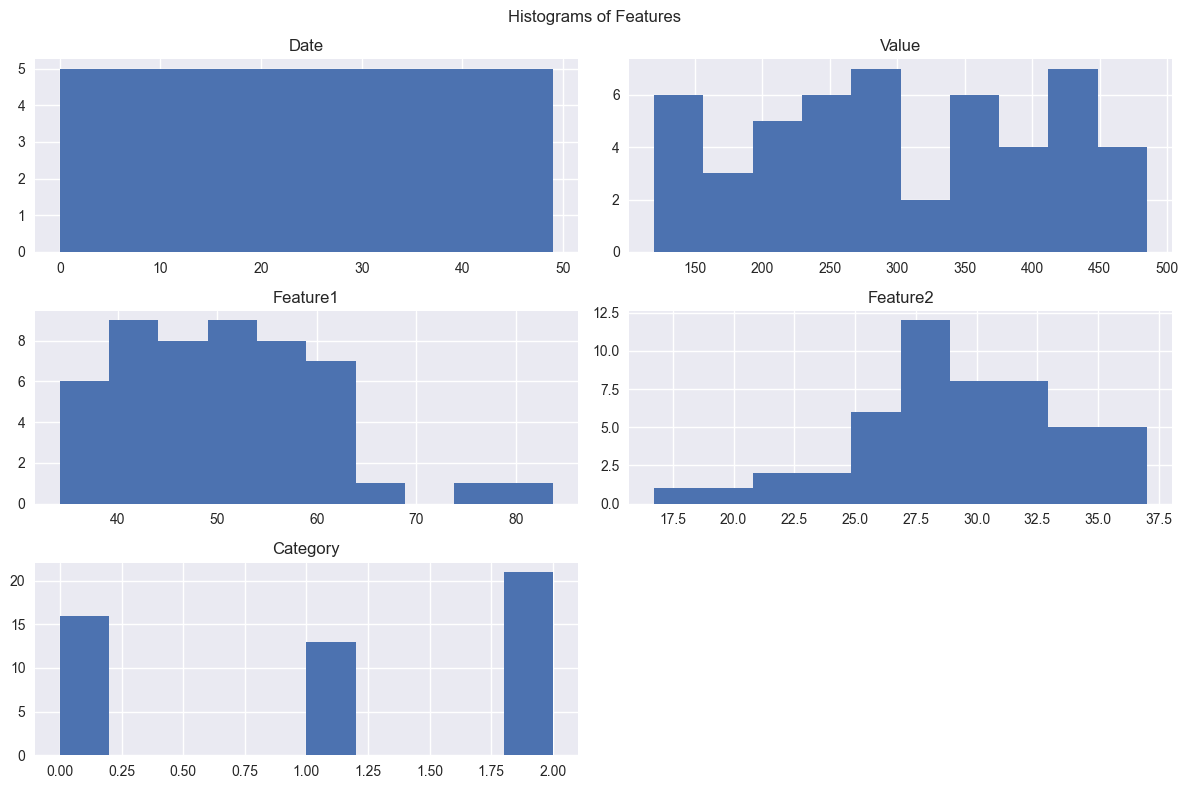

📊 Histogram saved: plots/histograms.png


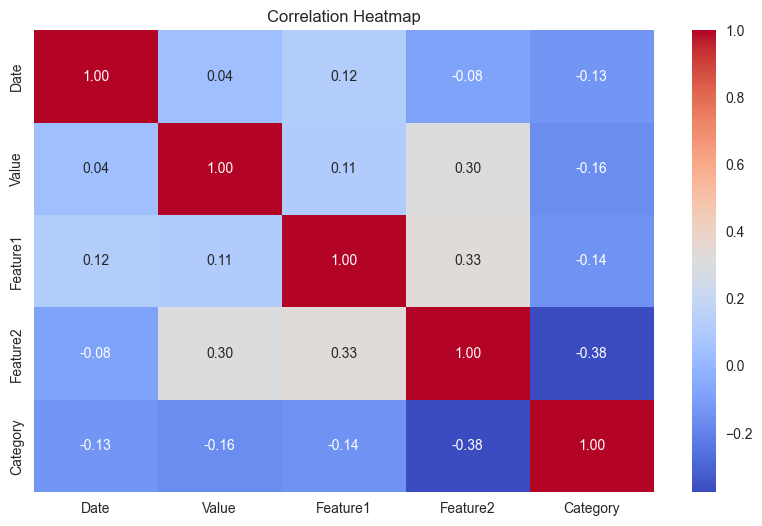

📊 Heatmap saved: plots/correlation_heatmap.png


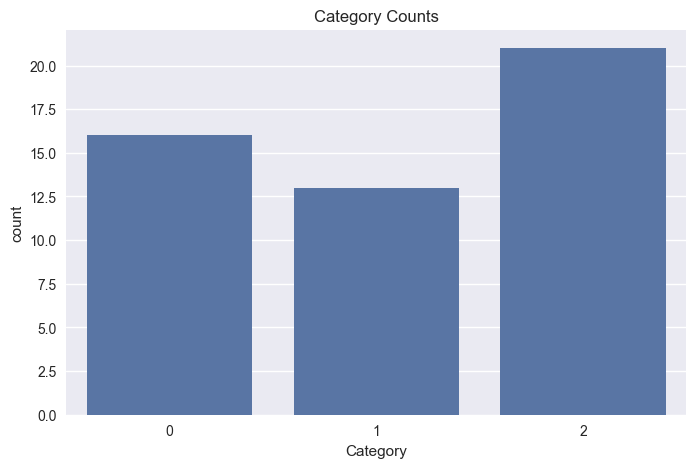

📊 Category counts saved: plots/category_counts.png

✅ All analysis complete! Check the 'plots/' folder for results.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder

# -------------------------------
# Step 1: Load Dataset
# -------------------------------
df = pd.read_csv("data_visualizer_dataset.csv")
print("✅ Dataset loaded successfully!")
print(df.head(), "\n")

# -------------------------------
# Step 2: Basic Info
# -------------------------------
print("📌 Dataset Shape:", df.shape)
print("\n📌 Dataset Info:")
print(df.info())
print("\n📌 Missing Values:\n", df.isnull().sum())
print("\n📌 Summary Statistics:\n", df.describe())

# -------------------------------
# Step 3: Handle Missing Values
# -------------------------------
df.ffill(inplace=True)
print("\n✅ Missing values handled!")

# -------------------------------
# Step 4: Encode Categorical Columns
# -------------------------------
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])
print("\n✅ Categorical columns encoded!")

# -------------------------------
# Step 5: Correlation Matrix
# -------------------------------
corr = df.corr()
print("\n📌 Correlation Matrix:\n", corr)

# -------------------------------
# Step 6: Visualization Setup
# -------------------------------
plt.style.use("seaborn-v0_8")   # ✅ Fixed style issue
os.makedirs("plots", exist_ok=True)

# -------------------------------
# Step 7: Histograms
# -------------------------------
df.hist(figsize=(12, 8))
plt.suptitle("Histograms of Features")
plt.tight_layout()
plt.savefig("plots/histograms.png")
plt.show()
print("📊 Histogram saved: plots/histograms.png")

# -------------------------------
# Step 8: Correlation Heatmap
# -------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("plots/correlation_heatmap.png")
plt.show()
print("📊 Heatmap saved: plots/correlation_heatmap.png")

# -------------------------------
# Step 9: Category Counts
# -------------------------------
if "Category" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x="Category", data=df)
    plt.title("Category Counts")
    plt.savefig("plots/category_counts.png")
    plt.show()
    print("📊 Category counts saved: plots/category_counts.png")

print("\n✅ All analysis complete! Check the 'plots/' folder for results.")
